In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns

# $\star$ Question 1:
Load the data from dataset.npz and split it evenly into a training set
and a test set. 

Each sample consists of a point in 2D and a class label
{1,2,3}. 

For each point in the test set, predict its label by a k-nearest
neighbor classifier “trained” using the training set. 

Compute the average
classification error using the true labels of the test set. 

Visualize the
training points and the classified points and mark misclassifications. Do
the same for different k.

In [5]:
dataset = np.load('../data/dataset.npz', mmap_mode='r')['arr_0']
print(dataset.shape)

(280, 3)


In [23]:
# Use train test split with 0.5
X_train, X_test = train_test_split(dataset, train_size=0.5)
print(X_train.shape, X_test.shape)
print(X_train[0, 0:2], X_train[0, 2])

(140, 3) (140, 3)
[0.3407537  2.80650572] 3.0


In [24]:
# Use KNeighbors Classifier from Sklearn
Classifier = KNeighborsClassifier(n_neighbors=5, weights='distance')
Classifier.fit(X_train[:, 0:2], X_train[:, 2])

KNeighborsClassifier(weights='distance')

In [25]:
# Get Predictions
X_test_preds = Classifier.predict(X_test[:, 0:2])

In [31]:
# Accuracy of predictions
accuracy = metrics.accuracy_score(X_test[:, 2], X_test_preds)
print(accuracy)

0.85


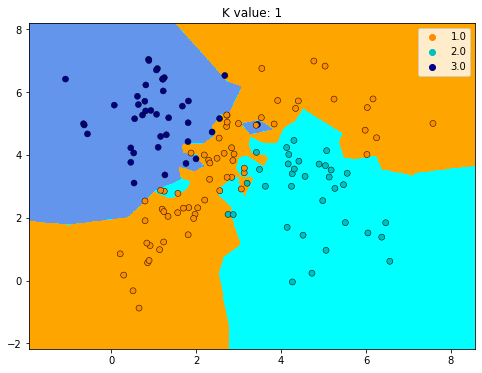

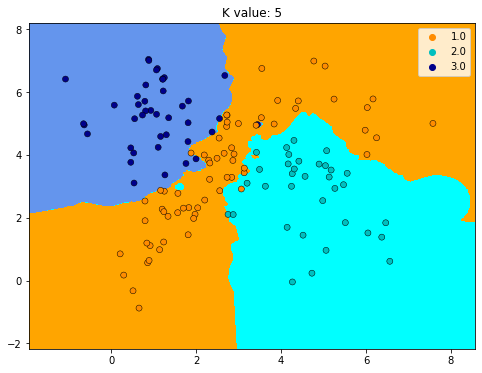

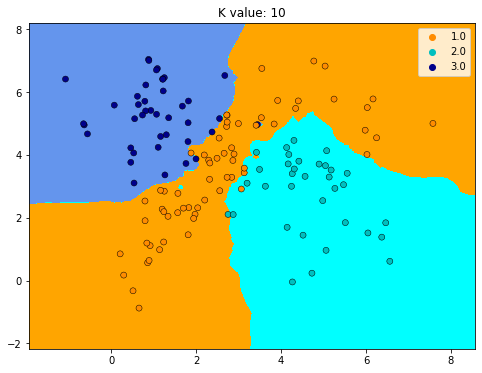

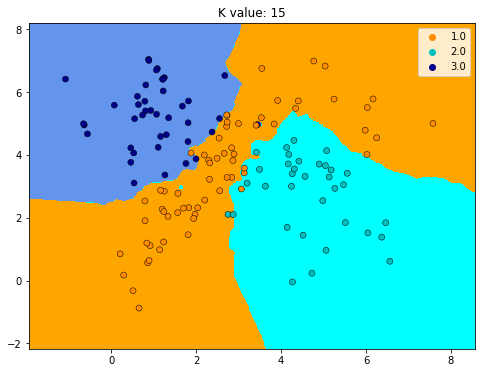

In [32]:
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']
X = X_train[:, 0:2]
y = X_train[:, 2]

h = .02 
K_values = [1, 5, 10, 15]

for k in K_values:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors=k, weights='distance')
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
#     sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold, alpha=1.0, edgecolor="black")
    sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=X_test_preds, palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("K value: {}".format(k))

plt.show()
        
    

# $\star$ Question 2:
Do the same as above for different splits of the set into training and
test set. 

Is the classification error always the same? 

Compute the mean and the variance of the classification error over multiple splits. 

How are the mean and the variance affected by k? 

What you should observe is an effect illustrating the so-called bias-variance tradeoff and will be discussed in more detail in the next class.

In [52]:
class NearestNeighborClassifier:
    def __init__(self, n_neighbors=5, weights='distance'):
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.classifier = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
        
    def set_data(self, X_train, X_test):
        self.X_train = X_train[:, 0:2]
        self.y_train = X_train[:, 2]
        self.X_test = X_test[:, 0:2]
        self.y_test = X_test[:, 2]
        
    def fit(self):
        self.classifier.fit(self.X_train, self.y_train)
    
    def predict(self):
        self.y_test_preds = self.classifier.predict(self.X_test)
    
    def model_accuracy(self):
        self.accuracy = metrics.accuracy_score(self.y_test, self.classifier.predict(self.X_test))
        return self.accuracy
        
    def plot(self, X, y):
        # Create color maps
        cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
        cmap_bold = ['darkorange', 'c', 'darkblue']

        h = .02 

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
#         sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold, alpha=1.0, edgecolor="black")
        sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=X_test_preds, palette=cmap_bold, alpha=1.0, edgecolor="black")
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("K value: {}".format(k))

        plt.show()

In [54]:
K = [1, 3, 5, 10, 15]
splits = [0.1, 0.2, 0.3, 0.4, 0.5]
for split in splits:
    X_train, X_test = train_test_split(dataset, test_size=split)
    for k in K:
        clf = NearestNeighborClassifier(n_neighbors=k)
        clf.set_data(X_train, X_test)
        clf.fit()
        accuracy = clf.model_accuracy()
        print("K = {}; Split = {}; Accuracy = {}".format(k, split, accuracy))
        

K = 1; Split = 0.1; Accuracy = 0.8571428571428571
K = 3; Split = 0.1; Accuracy = 0.8214285714285714
K = 5; Split = 0.1; Accuracy = 0.8571428571428571
K = 10; Split = 0.1; Accuracy = 0.8214285714285714
K = 15; Split = 0.1; Accuracy = 0.8571428571428571
K = 1; Split = 0.2; Accuracy = 0.8035714285714286
K = 3; Split = 0.2; Accuracy = 0.8214285714285714
K = 5; Split = 0.2; Accuracy = 0.8035714285714286
K = 10; Split = 0.2; Accuracy = 0.8214285714285714
K = 15; Split = 0.2; Accuracy = 0.8214285714285714
K = 1; Split = 0.3; Accuracy = 0.8452380952380952
K = 3; Split = 0.3; Accuracy = 0.8571428571428571
K = 5; Split = 0.3; Accuracy = 0.8571428571428571
K = 10; Split = 0.3; Accuracy = 0.8809523809523809
K = 15; Split = 0.3; Accuracy = 0.8928571428571429
K = 1; Split = 0.4; Accuracy = 0.7946428571428571
K = 3; Split = 0.4; Accuracy = 0.8482142857142857
K = 5; Split = 0.4; Accuracy = 0.8571428571428571
K = 10; Split = 0.4; Accuracy = 0.8482142857142857
K = 15; Split = 0.4; Accuracy = 0.866071428